In [273]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [274]:
k=np.linspace(0,np.pi, 100)

In [275]:
N=2

lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.Model(N=N, T=0, kind='dDSL', delta=[1,1], ns=[1,1], U=[1,1], mu=[0,0])
 

#lat.plot_lattice();

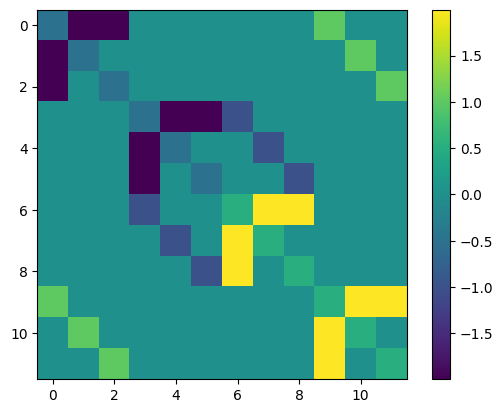

In [276]:
plt.imshow(np.real(ham.Hk(k[2], k[2])[0]))
plt.colorbar()

In [277]:
ham.DeltaN(40, False)

([(0.2528401608714898-7.665910971813148e-20j),
  (0.3500268781857247-2.389218180174779e-19j)],
 [0.0, 0.0])

In [278]:
#ham.plot_bands(k)

In [279]:
dels, nus = ham.Deltra(40,HF=True, alpha=0.7, Nmin=20, Nmax=50)

In [280]:
dels

array([[1.        +0.00000000e+00j, 0.77585205-2.29977329e-20j,
        0.60812569-6.06523278e-20j, 0.4814279 -6.71954925e-20j,
        0.38488051-1.65249733e-19j, 0.31067068-1.73533305e-19j,
        0.25311988-3.39852460e-20j, 0.20807005-3.55132105e-20j,
        0.17246294-3.81024183e-20j, 0.14404186-2.61919365e-20j,
        0.12113582-3.69064174e-20j, 0.10250194-8.97559600e-21j,
        0.08721031-1.78083878e-20j, 0.07456002-3.93584342e-20j,
        0.06401802-6.89151204e-21j, 0.05517475+5.55808364e-20j,
        0.04771206+5.70451495e-20j, 0.04138001+3.60978037e-20j,
        0.03598023+1.87141614e-21j, 0.0313538 -2.76595096e-20j,
        0.0273725 -5.17004283e-20j, 0.02393228-6.46516252e-20j,
        0.02094837-1.23695300e-19j, 0.01835145-1.50937092e-19j,
        0.0160847 -1.55330603e-19j, 0.01410136-1.08474467e-19j,
        0.01236274-1.27254780e-19j, 0.01083662-7.05010150e-20j,
        0.00949591-6.06527344e-20j, 0.00831763-8.10638672e-20j,
        0.00728207-1.24166355e-19j, 0.00

In [281]:
dels[:,-1]

array([0.00425635-1.31614389e-19j, 0.00411697-6.68365958e-19j])

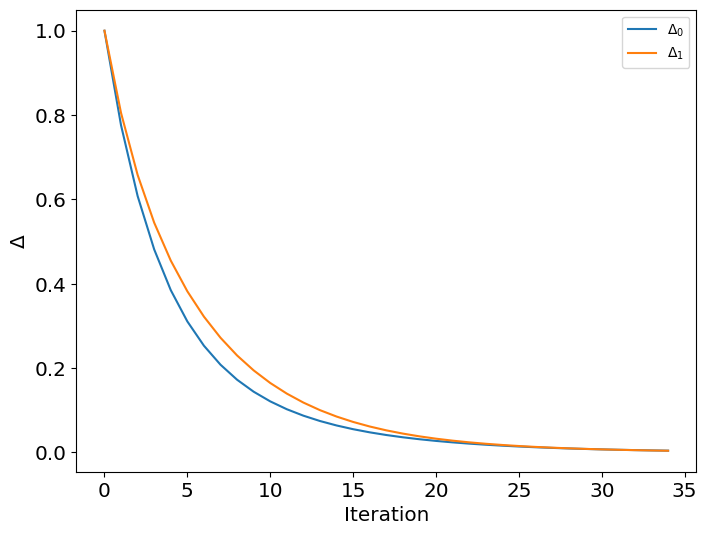

In [282]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

#plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
#plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
#plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')
for i,d in enumerate(dels):
    plt.plot(np.arange(len(dels[0])), np.real(d), label = f'$\Delta_{i}$')

plt.legend()

plt.show()

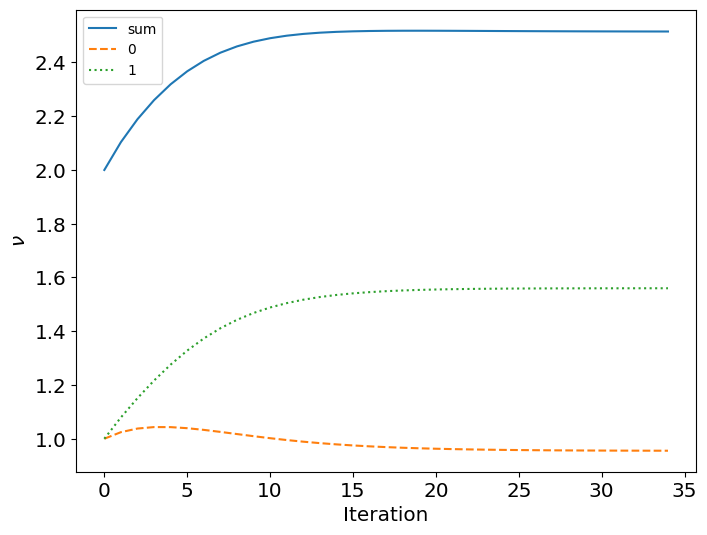

In [283]:
s1 = [np.sum(nus[:,i]) for i in range(np.shape(nus)[1])]

plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)
colors=['dashed', 'dotted', 'dashdot']
plt.plot(np.arange(len(s1)), s1, label = r'sum')
for i in range(2):
    plt.plot(np.arange(len(s1)),nus[i],linestyle=colors[i], label=f'{i}')

plt.legend()
plt.show()

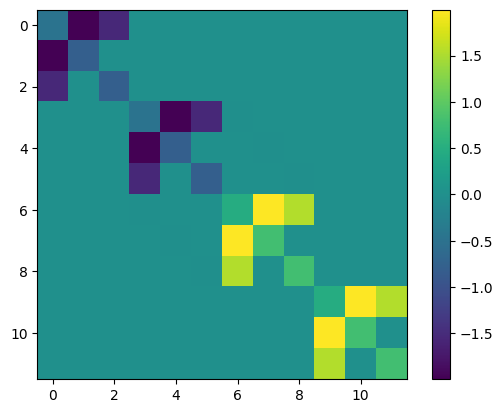

In [284]:
plt.imshow(np.real(ham.Hk(k[20], k[2])[0]))
plt.colorbar()

In [285]:
#ham.plot_bands(k)

In [286]:
ham.delta

array([0.00425635-1.31614389e-19j, 0.00411697-6.68365958e-19j])

Earr = np.linspace(-2.5,2.5,350)
DOS = np.zeros(350)
for i in range(1):
    DOS+=ham.DOS(Earr,k, b=i,p='all')

plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
plt.xlim(-0.6, 0.6)
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.show()

In [287]:
np.linspace(-np.pi, np.pi*0.1, 5)

array([-3.14159265, -2.27765467, -1.41371669, -0.54977871,  0.31415927])

In [288]:
sfws, sdsfw = ham.detSFW(30)


In [289]:
sdsfw

(0.027663009850412413+1.430160632835023e-18j)

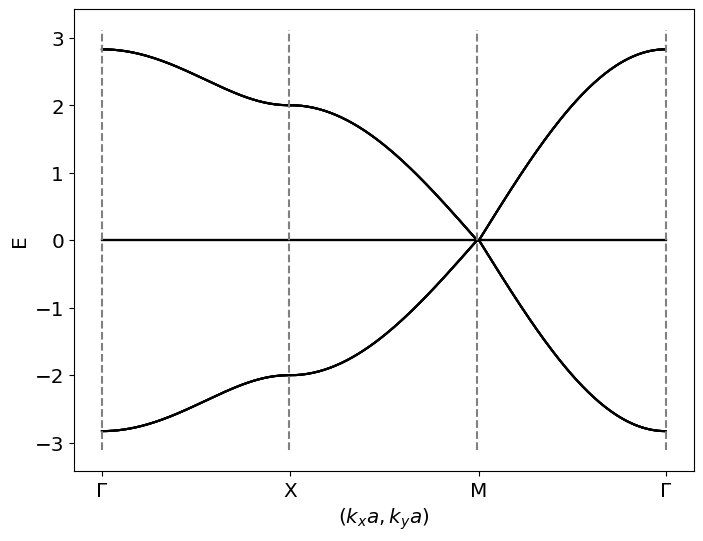

In [255]:
ham.plot_bands()

In [72]:
A = []
for n in np.linspace(5,40,5):
    sfw1 = ham.SFW(int(n), my='x', ny='y')
    A.append(sfw1)

KeyboardInterrupt: 

In [ ]:
A

[(0.031207142138561968+1.8800430205986206e-18j),
 (0.07849376980996803+8.748803685404556e-19j),
 (0.09243242617244513-5.736686450525378e-19j),
 (0.09751201992371218+3.6972092065282124e-19j),
 (0.09999817921846432+4.781805500792351e-19j)]

In [ ]:
ham.detSFW(30)

(array([[-3.74167212e+00-1.21712692e-18j,  1.03468647e-03+2.98660344e-19j],
        [ 1.03468647e-03+2.98660344e-19j, -3.74167212e+00+5.01151528e-19j]]),
 (3.7416719736358193+3.579051188488061e-19j))

In [ ]:
ham.ns

array([0.+0.j, 0.+0.j])

In [ ]:
sfw1/20**2

(5.104455713505204e-07-9.980460316989158e-21j)

In [ ]:
def fermidirac(E,T=0,o=0):

    nE=0
    if o==0:
        if np.abs(E)<1e-14 and T!=0:
            nE = 1
        elif T==0:
            if E>0:
                nE = 0
            else:
                nE = 1
        else:
            nE = 1/(1+np.exp(E/T))
    elif o==1:
        if np.abs(E)<1e-14 and T!=0:
            nE = 1/(4*T)
        elif T==0:
            nE = 0
        else:
            nE = 1/((1+np.exp(E/T))**2)*np.exp(E)/T

    return nE


def SFW(kx, ky, T=0, my='x', ny='y'):

    gammaz = np.kron(np.diag([1,-1]), np.eye(6))
    sum = 0
    karr = np.linspace(-np.pi,np.pi*0.1,N)
    
    pflist = []
    slist = []

    evals, evec = np.linalg.eigh(ham.Hk(kx,ky)[0])
    Evec = evec.T 

    nE = [fermidirac(E,T,o=0) for E in evals]
    dnE = [fermidirac(E,T,o=1) for E in evals]
    for k,i in enumerate(evals):
        for l,j in enumerate(evals):
            if np.abs(i-j)<1e-10 or k==l:
                pf = -dnE[l]
            else:
                pf = (nE[l]-nE[k])/(i-j)

            f1 = np.matmul(np.conjugate(Evec[k]),np.matmul(ham.Hk(kx,ky,o=my)[0],Evec[l]))
            f2 = np.matmul(np.conjugate(Evec[l]),np.matmul(ham.Hk(kx,ky,o=ny)[0],Evec[k]))

            M1 = np.matmul(ham.Hk(kx,ky,o=my)[0],gammaz)
            M2 = np.matmul(gammaz,ham.Hk(kx,ky,o=ny)[0])

            f3 = np.matmul(np.conjugate(Evec[l]),np.matmul(M1,Evec[k]))
            f4 = np.matmul(np.conjugate(Evec[k]),np.matmul(M2,Evec[l]))

            slist.append((pf*(f1*f2-f3*f4),i,j, f1,f2))
            sum+=pf*(f1*f2-f3*f4)

    return sum, pflist, slist

In [ ]:
for kx in karr:
            for ky in karr:

In [ ]:
sfw = SFW(-np.pi,0.2)

In [ ]:
sfw[0]

In [ ]:
sfw[-1]

In [ ]:
sfw[2]

In [ ]:
sfw[-1]

In [ ]:
0.076265*0.1188

In [ ]:
0.068012*0.105988

In [ ]:
sfw[3][0]*sfw[3][1]-sfw[3][2]*sfw[3][3]